## Text Retrieval with SVD: Principal Component Regression
In this notebook with show how to apply the SVD in the context of text retrieval. 

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Principal component regression

The minimal norm solution of $\| Ax -b \|$ is given byb

$$
\sum_{i=1}^r \frac{u^T_i b}{ \sigma_i}v_i
$$
If the smallest singular values are tiny, that is the numerical rank is not the same as the theoretical one, we look for the solution in a subspace of dimension $k$. If we use as a basis for this subspace the first $k$ vector of $v_i$ the solution is 

$$
\sum_{i=1}^k \frac{u^T_i b}{ \sigma_i}v_i
$$

It is useful to find the minimal value of $k$ that make the residual reduction sufficiently small. This algorithm is called Principal Component Regression

We show an example taken form the book of Larns Elden "Matrix Methods in Data Mining and Pattern Recognition", SIAM, 2007.

Term-document matrices are used in information retrieval. Consider the following selection of five documents. Keywords, which we call terms, are marked in boldface.

<b>Document:</b>
Document 1: The <b> Google </b>  <b> matrix </b> $P$ is a model of the <b> Internet</b>.
Document 2: $P_{ij}$ is nonzero if there is a <b>link</b> from <b> Web  page</b> j to i.
Document 3: The <b>Google</b>  <b>matrix</b> is used to rank all <b> Web pages</b>.
Document 4: The <b>ranking</b> is done by solving a <b>matrix</b>  <b>eigenvalue</b> problem.
Document 5: <b>England</b> dropped out of the top 10 in the <b>FIFA</b> ranking.
    
<b>Term<b>:

1. eigenvalue 
2. England 
3. FIFA 
4. Google 
5. Internet 
6. link 
7. matrix 
8. page 
9. rank 
10. Web

We define the associated matrix.

In [2]:
A = np.array([
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1],
[0, 0, 0, 0, 1],
[1, 0, 1, 0, 0],
[1, 0, 0, 0, 0],
[0, 1, 0, 0, 0],
[1, 0, 1, 1, 0],
[0, 1, 1, 0, 0],
[0, 0, 1, 1, 1],
[0, 1, 1, 0, 0]])

We have two query vectors:

$q_1$ “contains Google terms"

$q_2$ terms are related only to the “football document.”
    

In [3]:
q1 = np.array([ 
[0],
[0],
[0],
[0],
[0],
[0],
[0],
[1],
[1],
[1]])

q2 = np.array([ 
[0],
[1],
[1],
[0],
[0],
[0],
[0],
[0],
[0],
[0]])

Compute the SVD saving only the necessary information.

In [4]:
U, s, V = np.linalg.svd(A, full_matrices=False)
print('singular values = ',s)

xT = np.dot(V[0:5,:].T,(np.dot(q1.T, U[:,0:5])/s[0:5]).T)
print('solution vector = ')
print(xT)
print(V)

singular values =  [2.85464601 1.88228579 1.73205081 1.2603301  0.84827142]
solution vector = 
[[-4.44444444e-01]
 [ 2.22222222e-01]
 [ 6.66666667e-01]
 [ 6.38378239e-16]
 [ 1.11111111e-01]]
[[ 3.70237707e-01  2.91238553e-01  7.49794211e-01  4.06766946e-01
   2.24618430e-01]
 [-1.39281795e-01  7.02967348e-01  1.90855565e-01 -4.57341116e-01
  -4.90765469e-01]
 [-6.66666667e-01  3.33333333e-01  6.66133815e-16 -8.32667268e-16
   6.66666667e-01]
 [-4.72205185e-01  4.36045597e-02 -3.07754012e-02  7.28100546e-01
  -4.94007465e-01]
 [-4.19645613e-01 -5.54981571e-01  6.32799865e-01 -3.08624936e-01
  -1.42154828e-01]]


In [5]:
print('q1  coordinates  in terms of the first five left singular vectors of U')
print(np.dot( U[:,0:5].T ,q1))
print('\nq2  coordinates  in terms of the first five left singular vectors of U')
print(np.dot( U[:,0:5].T ,q2))

q1  coordinates  in terms of the first five left singular vectors of U
[[1.213196  ]
 [0.54741677]
 [0.76980036]
 [0.18167938]
 [0.39805265]]

q2  coordinates  in terms of the first five left singular vectors of U
[[ 0.15737043]
 [-0.52145691]
 [ 0.76980036]
 [-0.78393345]
 [-0.33516354]]


In [6]:
# residual of the two vectors changing k
res1=np.zeros((6,1)) 
res2=np.zeros((6,1))
nq1 = np.linalg.norm(q1,2)
nq2 = np.linalg.norm(q2,2)
for i in range(0,6):
   # xT1 = np.dot(V[0:i,:].T, np.dot( np.diag(1/s[0:i]),np.dot( U[:,0:i].T ,q1) ))
    xT1 = np.dot(V[0:i,:].T,(np.dot( q1.T, U[:,0:i])/s[0:i]).T)
    res1[i] = np.linalg.norm( np.dot(A,xT1)-q1,2)/nq1
   # xT2 = np.dot(V[0:i,:].T, np.dot( np.diag(1/s[0:i]),np.dot( U[:,0:i].T ,q2) ))
    xT2 = np.dot(V[0:i,:].T,(np.dot( q2.T, U[:,0:i])/s[0:i]).T)
    res2[i] = np.linalg.norm( np.dot(A,xT2)-q2,2)/nq2

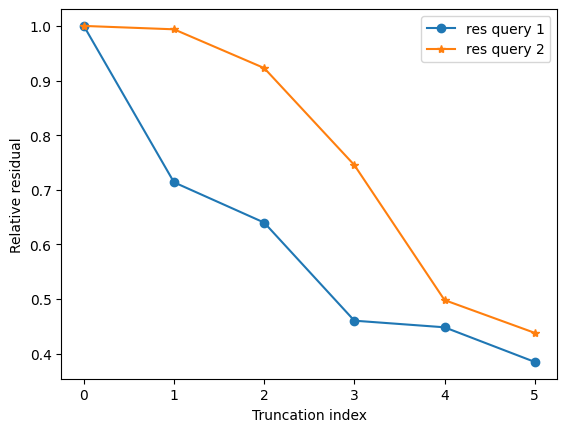

In [7]:
plt.plot(res1,'-o')
plt.plot(res2,'-*')
plt.xlabel('Truncation index')
plt.ylabel('Relative residual')
plt.legend(['res query 1', 'res query 2'])
plt.show()

If we want to reduce the relative residual to under 0.7 in this example, then we should choose k = 2 for $q_1$ and k = 4 for $q_2$.